In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]

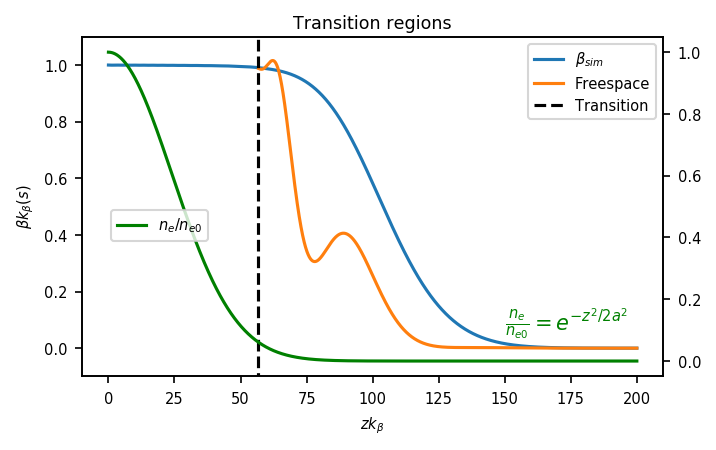

In [2]:
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 24
z, dz = np.linspace(0, 200, N, retstep=True)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

betam = 1/np.sqrt(frac)
alpham = -np.gradient(betam, dz)/2

cutoff = 0.1
zTran = z[-alpham>cutoff]
z2 = zTran - zTran[0]
fracTran = frac[-alpham>cutoff]
neTran = np.zeros(len(zTran))
tran1 = z[-alpham<=cutoff][-1]
betaTran = np.array(beta)[-alpham<=cutoff][-1]
alphaTran = np.array(alpha)[-alpham<=cutoff][-1]
gammaTran = (1+alphaTran**2)/betaTran

I0 = np.cumsum(fracTran)*dz
theta = np.sqrt(z2*I0)
c0 = betaTran + gammaTran * z2 / I0
c1 = betaTran - gammaTran * z2 / I0
c2 = -2*alphaTran*np.sqrt(z2 / I0)
betaMagnus = 0.5*(c0+c1*np.cos(2*theta)+c2*np.sin(2*theta))

beta2, alpha2, gamma2, gb2 = ecalc.cs_propagation(zTran, neTran, betaTran, alphaTran, gb0, dgdz0, ne0)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta*np.sqrt(frac))
plt.plot(zTran, betaMagnus/betam[-alpham>cutoff])
plt.plot([tran1, tran1], [-1, 2], 'k--')
plt.title(r'Transition regions')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta(s)$')
plt.legend([r'$\beta_{sim}$', 'Freespace', r'Transition'], loc=1)
plt.ylim(-0.1, 1.1)
plt.twinx()
plt.plot(z, frac, 'g')
plt.text(150, 0.1, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2a^2}$', color='green', fontsize=10)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
plt.ylim(-0.05, 1.05)
plt.legend([r'$n_{e}/n_{e0}$', 'A'], loc=(0.05, .4))
plt.show()

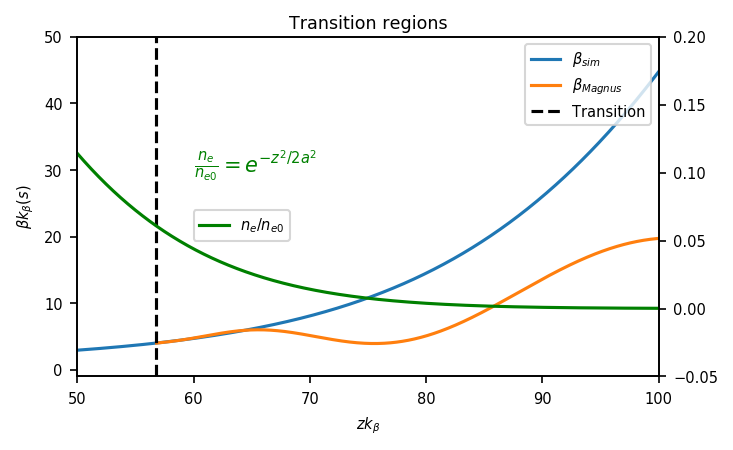

In [15]:
N = 3500
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 24
z, dz = np.linspace(0, 200, N, retstep=True)
frac = np.exp(-z**2/(2*a**2))
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)

betam = 1/np.sqrt(frac)
alpham = -np.gradient(betam, dz)/2

cutoff = 0.1
zTran = z[-alpham>cutoff]
z2 = zTran - zTran[0]
fracTran = frac[-alpham>cutoff]
neTran = np.zeros(len(zTran))
tran1 = z[-alpham<=cutoff][-1]
betaTran = np.array(beta)[-alpham<=cutoff][-1]
alphaTran = np.array(alpha)[-alpham<=cutoff][-1]
gammaTran = (1+alphaTran**2)/betaTran

I0 = np.cumsum(fracTran)*dz
theta = np.sqrt(z2*I0)
c0 = betaTran + gammaTran * z2 / I0
c1 = betaTran - gammaTran * z2 / I0
c2 = -2*alphaTran*np.sqrt(z2 / I0)
betaMagnus = 0.5*(c0+c1*np.cos(2*theta)+c2*np.sin(2*theta))

beta2, alpha2, gamma2, gb2 = ecalc.cs_propagation(zTran, neTran, betaTran, alphaTran, gb0, dgdz0, ne0)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta)
plt.plot(zTran, betaMagnus)
plt.plot([tran1, tran1], [-1, 50], 'k--')
plt.title(r'Transition regions')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta(s)$')
plt.legend([r'$\beta_{sim}$', r'$\beta_{Magnus}$', r'Transition'], loc=1)
plt.ylim(-1, 50)
plt.twinx()
plt.plot(z, frac, 'g')
plt.text(60, 0.1, r'$\frac{n_e}{n_{e0}}=e^{-z^2/2a^2}$', color='green', fontsize=10)
#plt.plot(z, z*np.exp(z**2/(4*a**2))/a**2, 'c')
plt.ylim(-0.05, 0.2)
plt.xlim(50, 100)
plt.legend([r'$n_{e}/n_{e0}$', 'A'], loc=(0.2, .4))
plt.show()